In [1]:
import DataProcessing

import sklearn
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt

In [2]:
df = DataProcessing.read_data('Dataset')
df = DataProcessing.preprocess_drop_col(df)
df = DataProcessing.preprocess_one_hot(df)
df['時'] = df['時'].apply(DataProcessing.process_hour)
df['GPS緯度'] = df['GPS緯度'].apply(DataProcessing.process_longtitute)
df['GPS經度'] = df['GPS經度'].apply(DataProcessing.process_latitude)
df = sklearn.utils.shuffle(df)
df.head(20)
x, y = DataProcessing.get_label(df)
print(y)
print(x.shape)


[1. 0. 0. ... 1. 1. 1.]
(66319, 620)


In [3]:
data_num = x.shape[0]
train_num = int(data_num * 0.7)
x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

In [4]:
svm = SVC(gamma='auto', kernel='rbf')
svm.fit(x_train,y_train)

SVC(gamma='auto')

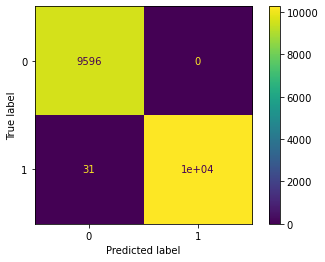

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9596
         1.0       1.00      1.00      1.00     10300

    accuracy                           1.00     19896
   macro avg       1.00      1.00      1.00     19896
weighted avg       1.00      1.00      1.00     19896



In [5]:
ypred = svm.predict(x_test)
CM = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)
ConfusionMatrixDisplay(confusion_matrix=CM).plot()
plt.show()
print(report)

In [6]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

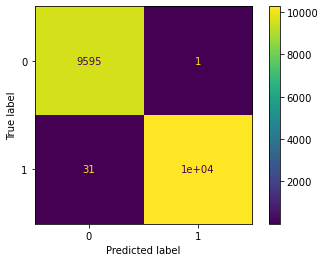

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9596
         1.0       1.00      1.00      1.00     10300

    accuracy                           1.00     19896
   macro avg       1.00      1.00      1.00     19896
weighted avg       1.00      1.00      1.00     19896



In [7]:
ypred = RFC.predict(x_test)
CM = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)
ConfusionMatrixDisplay(confusion_matrix=CM).plot()
plt.show()
print(report)

In [8]:
size_list = [32,16]
model = tf.keras.Sequential()
for i in size_list:
    model.add(layers.Dense(i))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

my_callbacks = [
    callbacks.EarlyStopping(patience=50, monitor = 'val_accuracy', restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=0, cooldown=3, min_lr=0.00001)
]

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history =  model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=my_callbacks)
model.summary()

Epoch 1/50
726/726 [==============================] - 4s 4ms/step - loss: 0.2834 - accuracy: 0.9009 - val_loss: 0.0197 - val_accuracy: 0.9983
Epoch 2/50
726/726 [==============================] - 2s 3ms/step - loss: 0.0430 - accuracy: 0.9939 - val_loss: 0.0131 - val_accuracy: 0.9984
Epoch 3/50
726/726 [==============================] - 2s 3ms/step - loss: 0.0277 - accuracy: 0.9965 - val_loss: 0.0100 - val_accuracy: 0.9984
Epoch 4/50
726/726 [==============================] - 2s 3ms/step - loss: 0.0299 - accuracy: 0.9963 - val_loss: 0.0094 - val_accuracy: 0.9984
Epoch 5/50
726/726 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.9963 - val_loss: 0.0092 - val_accuracy: 0.9984
Epoch 6/50
726/726 [==============================] - 2s 3ms/step - loss: 0.0232 - accuracy: 0.9970 - val_loss: 0.0094 - val_accuracy: 0.9984
Epoch 7/50
726/726 [==============================] - 2s 3ms/step - loss: 0.0181 - accuracy: 0.9972 - val_loss: 0.0093 - val_accuracy: 0.9984
Epoch 

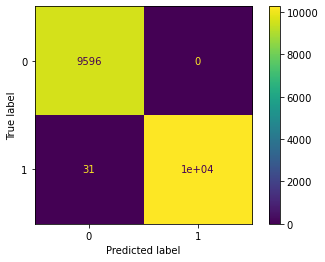

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9596
         1.0       1.00      1.00      1.00     10300

    accuracy                           1.00     19896
   macro avg       1.00      1.00      1.00     19896
weighted avg       1.00      1.00      1.00     19896



In [10]:
ypred = tf.round(model(x_test))

CM = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)
ConfusionMatrixDisplay(confusion_matrix=CM).plot()
plt.show()
print(report)